<a href="https://colab.research.google.com/github/seoyujiin/esaa_ob/blob/main/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9Cch3_4%2C_6~7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 딥러닝 텐서플로 p.87\~95, p.105\~115

##**PART 03 케라스(Keras)**

###**04 모델 세부 설정**

In [ ]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max()  # max: 255
x_test = x_test / x_test.max()  # max: 255

11490434/11490434 [==============================] - 0s 0us/step
train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


####**4-1 초기값 설정**

* 레이어의 초기화 방법을 다르게 설정할 수 있음
* Dense 레이어는 기본 초기화 방법으로 GlorotUniform 초기화 방법이 설정되어 있음
* 기본값으로 설정된 GlorotUniform 초기화 방법을 HeNormal로 변경하기 위해서는 kernel_initializer 매개변수에 설정하면 됨
  * 문자열로 지정하는 방법과 클래스 인스턴스로 지정하는 방법이 있음

In [ ]:
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

In [ ]:
# 문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
print(dense.get_config()['kernel_initializer'])

# 클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation='relu')
print(dense.get_config()['kernel_initializer'])

{'class_name': 'HeNormal', 'config': {'seed': None}}
{'class_name': 'HeNormal', 'config': {'seed': None}}


* 케라스에서 지원하는 자주 사용되는 초기화 목록
  * 'glorot_normal', 'glorot_uniform': 글로럿 초기화(Xavier 초기화)
  * 'lecun_normal', 'lecun_uniform': Yann Lecun 초기화
  * 'he_normal', 'he_uniform': He 초기화
  * 'random_normal', 'random_uniform': 정규 분포, 연속균등 분포 초기화

####**4-2 규제(Regularization)**

* 모델의 과대적합을 해소하기 위해 L1, L2 규제를 적용
* 텐서플로 케라스 레이어는 기본값으로 규제를 적용하지 않고 있으므로 레이어에 규제를 적용하기 위해서는 별도로 설정해 주어야 함
* 규제를 적용하기 위해선는 kernel_regularizer에 규제를 지정하면 됨

In [ ]:
# 기본값
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'name': 'dense_3',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [ ]:
# l1 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

# 클래스 인스턴스 적용, alpha=0.1 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}
{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


####**4-3 드롭아웃(Dropout)**

* 딥러닝 모델의 층이 넓고 깊어질 때(wide-and-deep) 모델은 훈련에 주어진 샘플에 과하게 적합하도록 학습하는 경향이 있음
* 따라서 훈련할 때 만나지 못한 새로운 데이터에 대해서는 좋지 않는 예측력을 보일 때가 많음. 즉, 훈련 데이터셋에 너무 적응하여 검증 데이터셋이나 테스트 데이터셋에 대해 일반화된 성능을 갖지 못하는 문제가 자주 발생하는 편
* 드롭아웃은 모델의 과대적합 문제를 해결하기 위해 제안된 아이디어
  * 노드의 일부 신호를 임의로 삭제하게 되면, 모델이 쉽게 과대적합 되는 것을 방지할 수 있음(모델이 학습하는 가중치 파라미터의 개수가 현저하게 줄어들게 되기 때문)
  * 모델이 훈련할 때는 드롭아웃이 적용되어 노드 중 일부만 훈련하게 되지만, 예측 시점에는 모든 노드들이 활용됨

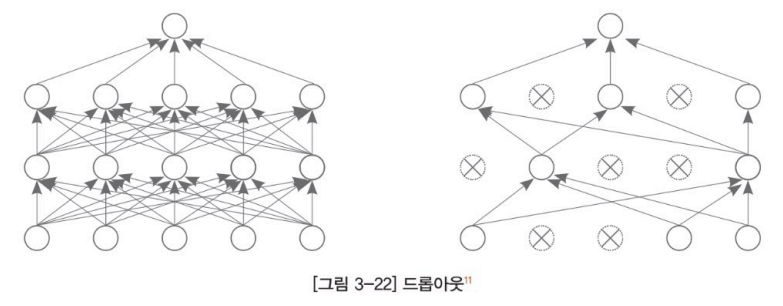

In [ ]:
# Dropout 25% 비율 적용(25%의 노드가 삭제)
tf.keras.layers.Dropout(0.25)

####**4-4 배치 정규화(Batch Normalization)**

* 배치 정규화: 각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일을 정규화
* 다음 층으로 데이터가 전달되기 전에 스케일을 조정하기 때문에 보다 안정적인 훈련이 가능하고 성능을 크게 향상시킬 수 있음
* 배치 정규화 층은 케라스에서 클래스 함수로 지원하기 때문에 별도로 코드를 구현할 필요가 없고, 클래스 인스턴스를 생성하여 추가해주면 됨

In [ ]:
# Model A: Dense + ReLU
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Model B: Dense + BatchNorm + ReLU
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax'),
])

model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

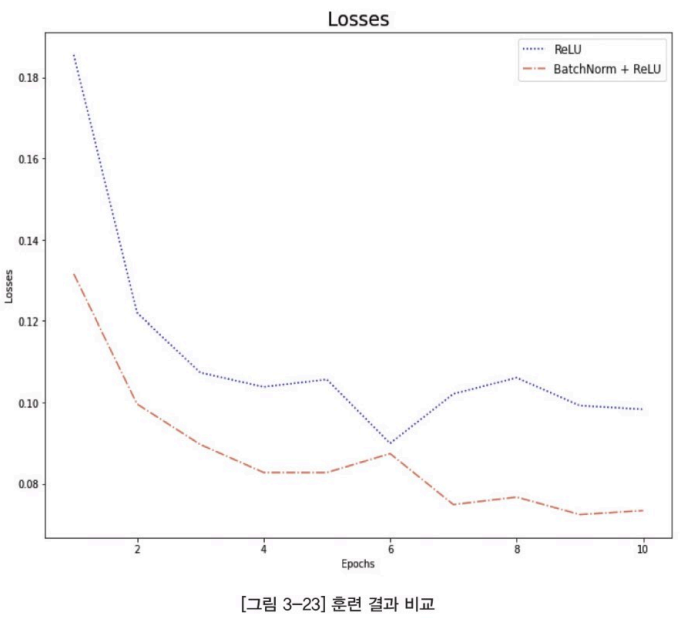

→ 배치 정규화만 추가하였는데 손실은 이전 대비 더 안정적이고 빠르게 수렴함

→ 데이터 개수가 적은 편인 mnist 손글씨 데이터셋에서는 큰 차이를 보이지 않을 수 있지만, 더 크고 복잡한 데이터셋에 대해서는 배치 정규화 유무가 모델 성능에 크게 영향을 미치는 경우도 있으므로 배치 정규화를 적극 적용해 볼 필요가 있음

####**4-5 활성화(activation) 함수**

* 활성화 함수를 적용할 때, 클래스 인스턴스로 선언하여 하이퍼파라미터 값을 변경하여 적용할 수 있음

In [ ]:
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [ ]:
# Model C: Dense + BatchNorm + LeakyReLU(0.2)
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 (LeakyReLU, alpha=0.2) 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10, activation='softmax'),
])

model_c.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                      

* 3개의 모델을 동일한 조건으로 10번의 epoch 동안 훈련한 후 수렴 속도 확인
  * model_a: Dense 레이어 + ReLU 활성화 함수
  * model_b: Dense 레이어 + 배치 정규화
  * model_c: Dense 레이어 + 배치 정규화 + LeakyReLU(0.2) 활성화 함수

In [ ]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model A : Dense + ReLU
history_a = model_a.fit(x_train, y_train,
                        validation_data=(x_test, y_test), epochs=10)
# Model B : Dense + BatchNorm + ReLU
history_b = model_b.fit(x_train, y_train,
                        validation_data=(x_test, y_test), epochs=10)
#Model C : Dense + BatchNorm + LeakyReLU(0,2)
history_c = model_c.fit(x_train, y_train,
                        validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2965 - accuracy: 0.9151 - val_loss: 0.1576 - val_accuracy: 0.9537
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1364 - accuracy: 0.9595 - val_loss: 0.1199 - val_accuracy: 0.9635
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0995 - accuracy: 0.9700 - val_loss: 0.1113 - val_accuracy: 0.9661
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0787 - accuracy: 0.9759 - val_loss: 0.1064 - val_accuracy: 0.9676
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0653 - accuracy: 0.9797 - val_loss: 0.0917 - val_accuracy: 0.9721
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0548 - accuracy: 0.9825 - val_loss: 0.0961 - val_accuracy: 0.9740
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0458 - accuracy: 0.9855 - val_loss: 0.0874 - val_accur

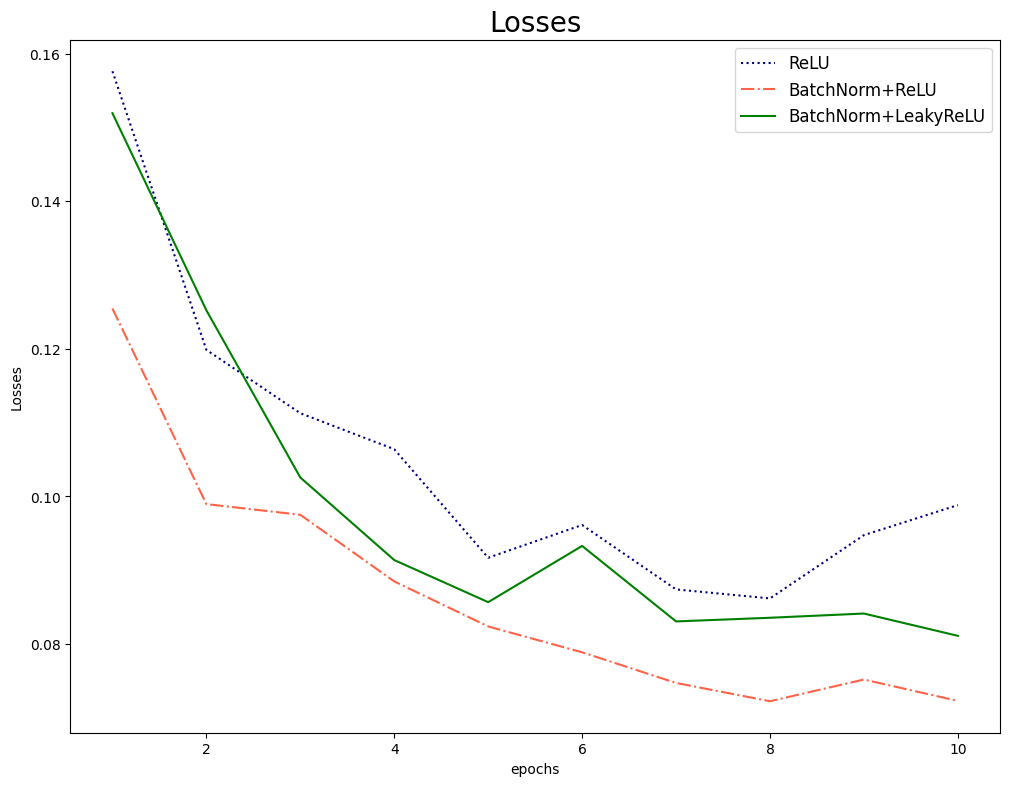

In [ ]:
# epoch별 검증 손실의 감소 추이 확인
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1, 11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1, 11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm+ReLU', 'BatchNorm+LeakyReLU'], fontsize=12)
plt.show()

→ mnist 데이터셋은 모델별 차이가 크지는 않음

→ 하지만 좀 더 복잡한 데이터셋을 다룬다면 배치 정규화와 다른 활성화 함수를 적용해 보면서 모델의 훈련 추이를 관찰해 볼 필요가 있음

###**06 모델 저장 및 불러오기**

In [ ]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'), # 노드는 10개가 되어야 함
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train,
            validation_data=(x_test, y_test),
            epochs=10,
            )

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2288 - accuracy: 0.9318 - val_loss: 0.1162 - val_accuracy: 0.9657
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0930 - accuracy: 0.9716 - val_loss: 0.0856 - val_accuracy: 0.9765
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0655 - accuracy: 0.9800 - val_loss: 0.1008 - val_accuracy: 0.9704
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0485 - accuracy: 0.9843 - val_loss: 0.0823 - val_accuracy: 0.9769
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0388 - accuracy: 0.9872 - val_loss: 0.0929 - val_accuracy: 0.9744
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0330 - accuracy: 0.9892 - val_loss: 0.0828 - val_accuracy: 0.9774
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0274 - accuracy: 0.9910 - val_loss: 0.0807 - val_ac

####**6-1 모델을 파일로 저장**

* 훈련을 종료하여 가중치가 업데이트된 모델 인스턴스를 저장할 수 있음
* save() 메소드를 사용하는데, save() 메소드를 호출할 때 저장할 파일의 디렉토리를 포함하는 파일명을 매개변수로 지정함
* 모델 저장되는 형식은 HDF5 포매소가 SavedModel 포맷 두 가지

In [ ]:
# 모델명을 h5 포맷으로 저장
model.save('h5-model.h5')

####**6-2 저장된 모델 복원**

* tensorflow.keras.models.load_model() 메소드로 저장된 모델 복원

In [ ]:
# 모델 복원
h5_model = tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               200960    
                                                                 
 dense_17 (Dense)            (None, 64)                16448     
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 검증
# 검증 셋을 evaluate 함수에 대입해, 손실함수와 평가지표 계산
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5_model] loss: {loss:.5f}, acc: {acc:.5f}')

h5_model] loss: 0.08702, acc: 0.98140


* .h5 확장자를 생략하면 SavedModel 포맷으로 저장되며 텐서플로2에서 기본으로 지원하는 파일 포맷임
* SavedModel 포맷으로 저장된 모델을 복원할 때 HDF5와 같은 방식으로 복원하면 됨

In [ ]:
# 모델을 SavedModel 포맷으로 저장
model.save('saved-model')

In [ ]:
# 모델 복원
saved_model = tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               200960    
                                                                 
 dense_17 (Dense)            (None, 64)                16448     
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 검증(HDF5 포맷)
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5_model] loss: {loss:.5f}, acc: {acc:.5f}')

# 모델 검증(SavedModel 포맷)
loss, acc = saved_model.evaluate(x_test, y_test, verbose= 0)
print(f'saved_model] loss: {loss:.5f}, acc: {acc:.5f}')

h5_model] loss: 0.08702, acc: 0.98140
saved_model] loss: 0.08702, acc: 0.98140


→ SavedModel 형식과 HDF5 형식으로 저장 및 복원된 모델이 동일한 성능 나타냄

###**07 복잡한 모델 생성**

####**7-1 함수형 API(Functional API)**

* 함수 형태로 딥러닝 모델을 정의하면 다양한 모델 구조를 구현할 수 있음
* 여러 층을 시퀀스 형태로 연결하는 Sequential API와 다르게, Functional API는 복잡한 구조의 모델을 정의할 수 있음
* Sequential API를 사용하는 경우 단방향의 Sequential 모델만 구현할 수 있다는 제약이 있음. 데이터 흐름이 특정 레이어를 건너뛰거나, 병합 및 분리하는 등의 구조의 모델을 구현할 수는 없음
* 함수형 API를 사용하기 위해서는 먼저 Input 레이어 정의 → Inuput 레이어에 데이터의 입력 shape 정의 → 레이어마다 반환되는 출력 값을 변수에 저장한 뒤 다음 레이어의 입력으로 연결

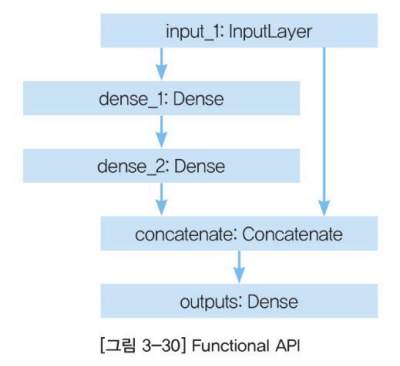

In [ ]:
# Sequential API로 구현한 mnist 분류기 모델을 함수형 API로 동일하게 구현
# 모델의 레이어를 체인 구조로 연결 Input 레이어 정의
input_layer = tf.keras.Input(shape=(28, 28), name='InputLayer')

# 모델의 레이어를 체인 구조로 연결
x1 = tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3 = tf.keras.layers.Dense(64, activation='relu', name='Dense2')(x2)
x4 = tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x3)

* 레이어마다 name 매개변수로 이름을 부여할 수 있음(모델 인스턴스에 대하여 summary()로 요약 출력할 때 이름이 함께 출력됨)
* tf.keras.Model()에 inputs 매개변수로 입력층인 input_layer를 지정하고 outputs 매개변수에 출력층을 지정해주어 모델 생성

In [ ]:
# 모델 생성 - 첫 Input 레이어로 시작하여 x4 변수는 마지막 출력층을 나타냄
func_model = tf.keras.Model(inputs=input_layer, outputs=x4, name='FunctionalModel')

# 모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


* 복잡한 구조를 갖는 모델을 생성할 때 summary()로는 모델의 구조도를 시각화하기 어려움
* 케라스의 유틸 패키지에서 제공하는 plot_model 모듈을 활용하여 모델 구조도 시각화 가능
  * plot_model()에 모델 지정하면 구조도 출력
  * show_shapes=True로 지정하면 데이터의 입출력 shape 출력
  * show_layer_names=True로 지정하면 레이어의 이름 출력
  * 시각화한 구조도를 to_file 매개변수에 파일명을 입력하면 이미지 파일로 저장 가능

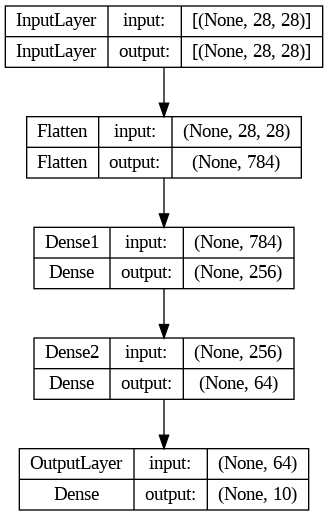

In [ ]:
from tensorflow.keras.utils import plot_model

# 구조도 시각화
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

* 함수형 API로 생성한 모델도 Sequential API로 생성한 모델과 동일한 방식으로 훈련할 수 있음
* 생성된 모델 인스턴스에 compile() 메소드로 모델을 컴파일하고 fit() 메소드로 모델을 훈련함
* 훈련이 완료된 뒤 evaluate() 메소드로 검증

In [ ]:
# 컴파일
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
func_model.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2115 - accuracy: 0.9374
Epoch 2/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0873 - accuracy: 0.9739
Epoch 3/3
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0612 - accuracy: 0.9805
Functional Model] loss: 0.08081, acc: 0.97530


####**7-2 모델 서브클래싱(Model Subclassing)**

* Model 클래스를 직접 상속받아 사용자가 직접 서브클래스로 딥러닝 모델을 만들 수 있음
* Model Subclassing으로 모델 인스턴스를 생성하기 위해서는 tf.keras.Model을 상속받아 생성하고자 하는 모델 클래스를 구현함. 모델의 \_\_init__() 함수에 레이어 정의하고 레이어의 하이퍼파라미터 정의함

In [ ]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    # 초기값 설정
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(256, activation='relu')
    self.dense2 = tf.keras.layers.Dense(64, activation='relu')
    self.dense3 = tf.keras.layers.Dense(10, activation='softmax')

  # method overiding
  # 훈련용 함수 정의
  # x는 input
  def call(self, x):
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    return x

→ call() 함수를 메소드 오버라이딩으로 구현. call() 메소드는 fit() 메소드가 호출되어 훈련하는 경우 호출될 함수

→ call() 내부에서는 모델의 입력부터 출력까지의 흐름, 즉 순전파(forward propagation)를 정의하고 함수형 API와 같은 방식으로 모든 레이어를 체인처럼 연결함. 마지막으로 최종 출력 값을 return함

In [ ]:
# 모델 생성
mymodel = MyModel()

# 모델의 이름 설정 - 모델 인스턴스에 _name에 이름 지
mymodel._name = 'subclass_model'

# 모델 input 정의 - mymodel에 Input 레이어와 함께 shape 정의해주면 summary()로 모델 요약 확인 가능
mymodel(tf.keras.layers.Input(shape=(28, 28)))

# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         multiple                  0         
                                                                 
 dense_24 (Dense)            multiple                  200960    
                                                                 
 dense_25 (Dense)            multiple                  16448     
                                                                 
 dense_26 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2128 - accuracy: 0.9384
Epoch 2/3
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0873 - accuracy: 0.9729
Epoch 3/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0595 - accuracy: 0.9811
Subclassing Model] loss: 0.07866, acc: 0.97420


####**7-3 서브클래싱 모델 파라미터를 활용한 생성**

* Model Subclassing으로 생성하는 장점은 생성자 파라미터로 모델 내부 레이어의 하이퍼파라미터를 지정할 수 있다는 점

In [ ]:
# 모델 생성자 파라미터 추가해 동적으로 레이어의 유닛 개수 초기화
class MyModel(tf.keras.Model):

  # 생성자 파라미터 추가
  def __init__(self, units, num_classes):
    super(MyModel, self).__init__()
    # 초기값 설정
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(units, activation='relu')
    self.dense2 = tf.keras.layers.Dense(units/4, activation='relu')
    self.dense3 = tf.keras.layers.Dense(num_classes, activation='softmax')

  # class overiding
  # 훈련용 함수 정의
  # x는 input
  def call(self, x):
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    return x

In [ ]:
# 기준이 되는 unit의 개수 입력받아 Dense 레이어의 유닛 개수 계산하여 설정
# 모델 생성
mymodel = MyModel(256, 10)

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

# 모델 요약
mymodel.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         multiple                  0         
                                                                 
 dense_27 (Dense)            multiple                  200960    
                                                                 
 dense_28 (Dense)            multiple                  16448     
                                                                 
 dense_29 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


→ 모델 생성자에 생성자 파라미터로 초기화하여 생성한 모델에 summary()로 요약한 결과 동적으로 설정한 레이어의 파라미터 초기화되었음

In [ ]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model w.parameters] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 15s 7ms/step - loss: 0.2078 - accuracy: 0.9383
Epoch 2/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0858 - accuracy: 0.9731
Epoch 3/3
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0605 - accuracy: 0.9806
Subclassing Model w.parameters] loss: 0.08825, acc: 0.97590


→ 이렇게 생성한 모델도 동일하게 compile() 메소드로 컴파일 한 뒤 fit() 메소드로 훈련함. 훈련이 완료된 뒤 모델 인스턴스의 evaluate() 메소드로 모델의 성능 검증